In [1]:
import csv
import statistics
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from collections import Counter
from collections import defaultdict

class Deposit:
    def __init__(self, affiliate_id, user_id, country, amount, date):
        self.affiliate_id = affiliate_id
        self.user_id = user_id
        self.country = country
        self.amount = amount
        self.date = date

deposits = []

class User:
    def __init__(self, affiliate_id, user_id, country, deposit_count, total_deposit_amount, registration_date):
        self.affiliate_id = affiliate_id
        self.user_id = user_id
        self.country = country
        self.deposit_count = deposit_count
        self.total_deposit_amount = total_deposit_amount
        self.average_deposit = total_deposit_amount / deposit_count if deposit_count > 0 else 0
        self.registration_date = registration_date

with open('data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        deposit = Deposit(
            int(row['AffiliateID']),
            int(row['UserID']),
            row['Country'],
            int(row['Deposit amount (EUR)']),
            row['Deposit date']
        )
        deposits.append(deposit)
        
def create_user_objects_from_deposits(deposits):
    user_map = defaultdict(User)

    for deposit in deposits:
        if deposit.user_id in user_map:
            user = user_map[deposit.user_id]
            user.total_deposit_amount += deposit.amount
            user.deposit_count += 1
            user.average_deposit = user.total_deposit_amount / user.deposit_count
        else:
            user = User(
                deposit.affiliate_id,
                deposit.user_id,
                deposit.country,
                1,
                deposit.amount,
                deposit.date
            )
            user_map[deposit.user_id] = user

    user_list = list(user_map.values())
    return user_list

users = create_user_objects_from_deposits(deposits)
        
country_counter = Counter(deposit.country for deposit in deposits)
countries = list(country_counter.keys())
counts = list(country_counter.values())
total_count = sum(counts)
country_sums = {}
total_amount = 0

for deposit in deposits:
    country = deposit.country
    amount = deposit.amount
    total_amount += amount 

    if country in country_sums:
        country_sums[country] += amount
    else:
        country_sums[country] = amount

countries = list(country_sums.keys())
amount_sums = list(country_sums.values())
labels = [f'{country} (€{amount_sums[i]})' for i, country in enumerate(countries)]

all_countries_amounts = [deposit.amount for deposit in deposits]
average_all_countries = round(statistics.mean(all_countries_amounts), 2)

country_amounts = defaultdict(list)
for deposit in deposits:
    country_amounts[deposit.country].append(deposit.amount)

average_per_country = {}
for country, amounts in country_amounts.items():
    average_per_country[country] = round(statistics.mean(amounts), 2)

start_time_1 = datetime.strptime("22:00", "%H:%M").time()
end_time_1 = datetime.strptime("08:00", "%H:%M").time()
start_time_2 = datetime.strptime("08:00", "%H:%M").time()
end_time_2 = datetime.strptime("22:00", "%H:%M").time()

nighttime_count = 0
daytime_count = 0

for deposit in deposits:
    deposit_time = datetime.strptime(deposit.date, "%Y-%m-%d %H:%M").time()

    if start_time_1 <= deposit_time or deposit_time < end_time_1:
        nighttime_count += 1
    else:
        daytime_count += 1

nighttime_amount_sum = 0
daytime_amount_sum = 0

for deposit in deposits:
    deposit_time = datetime.strptime(deposit.date, "%Y-%m-%d %H:%M").time()
    deposit_amount = deposit.amount

    if start_time_1 <= deposit_time or deposit_time < end_time_1:
        nighttime_amount_sum += deposit_amount
    else:
        daytime_amount_sum += deposit_amount

time_ranges = ["nighttime (22:00-8:00)\nCount: " + str(nighttime_count), "daytime (8:00-22:00)\nCount: " + str(daytime_count)]
counts = [nighttime_count, daytime_count]

amount_ranges = ["nighttime (22:00-8:00)\nCount: " + str(nighttime_amount_sum), "daytime (8:00-22:00)\nAmount: " + str(daytime_amount_sum)]
sums = nighttime_amount_sum, daytime_amount_sum


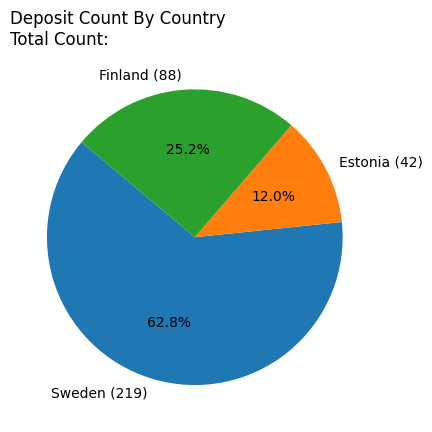

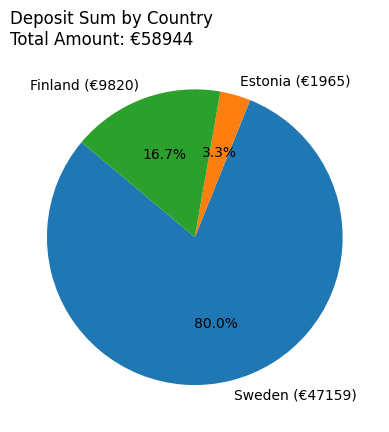

In [3]:
sorted_countries = set(deposit.country for deposit in deposits)
sorted_counts = {}

for deposit in deposits:
    country = deposit.country
    if country in sorted_counts:
        sorted_counts[country] += 1
    else:
        sorted_counts[country] = 1

plt.pie(sorted_counts.values(), labels=[f'{country} ({count})' for country, count in sorted_counts.items()], autopct='%1.1f%%', startangle=140)
plt.title('Deposit Count By Country\nTotal Count:'.format(total_count), loc='left')
plt.show()

plt.pie(amount_sums, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Deposit Sum by Country\nTotal Amount: €{}'.format(total_amount), loc='left') 
plt.show()

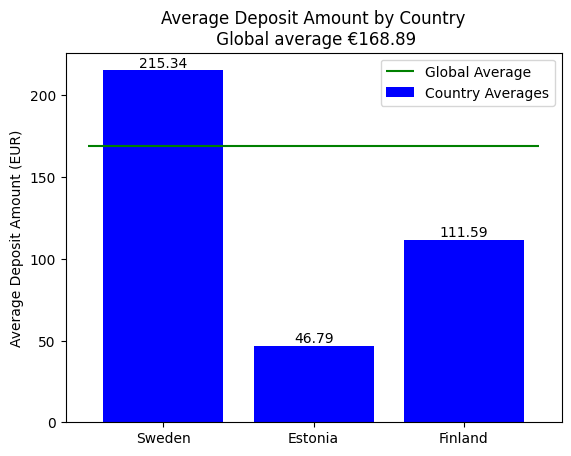

In [2]:
countries = list(average_per_country.keys())
averages = list(average_per_country.values())
bars = plt.bar(countries, averages, color='blue', label='Country Averages')
for bar, avg in zip(bars, averages):
    plt.text(bar.get_x() + bar.get_width() / 2, avg, f'{avg:.2f}', ha='center', va='bottom')

plt.ylabel('Average Deposit Amount (EUR)')
plt.title('Average Deposit Amount by Country\n Global average €{}'.format(average_all_countries))
plt.hlines(average_all_countries, xmin=-0.5, xmax=len(average_per_country) - 0.5, colors='green', label='Global Average')
plt.legend()
plt.show()

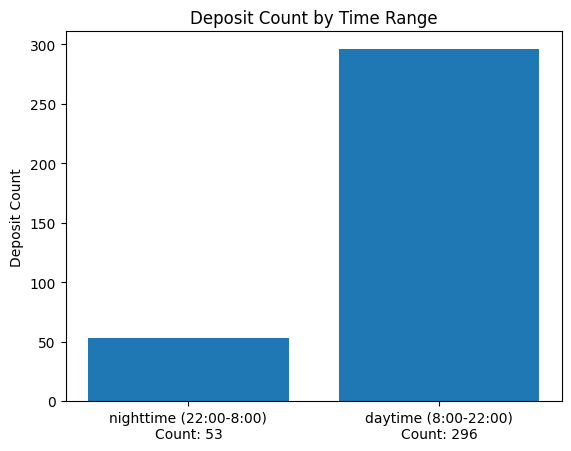

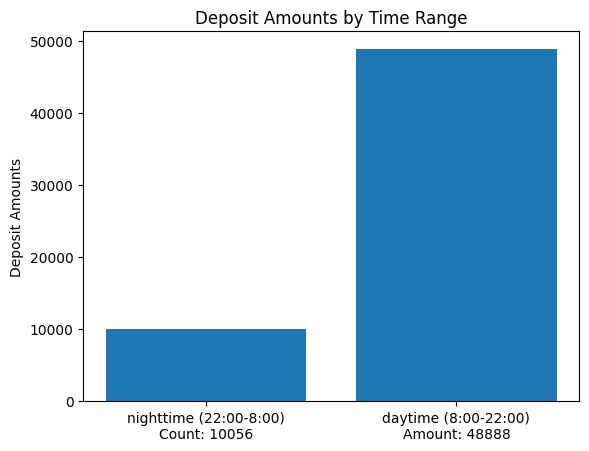

In [4]:
plt.bar(time_ranges, counts)
plt.ylabel('Deposit Count')
plt.title('Deposit Count by Time Range')
plt.show()

plt.bar(amount_ranges, sums)
plt.ylabel('Deposit Amounts')
plt.title('Deposit Amounts by Time Range')
plt.show()

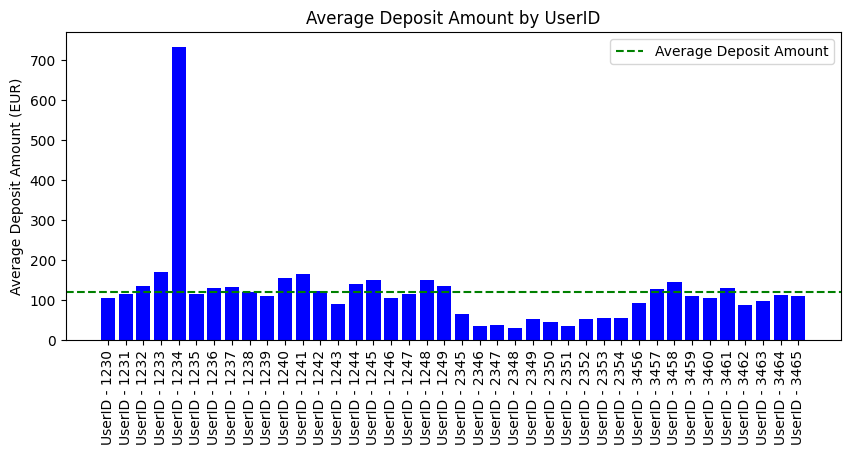

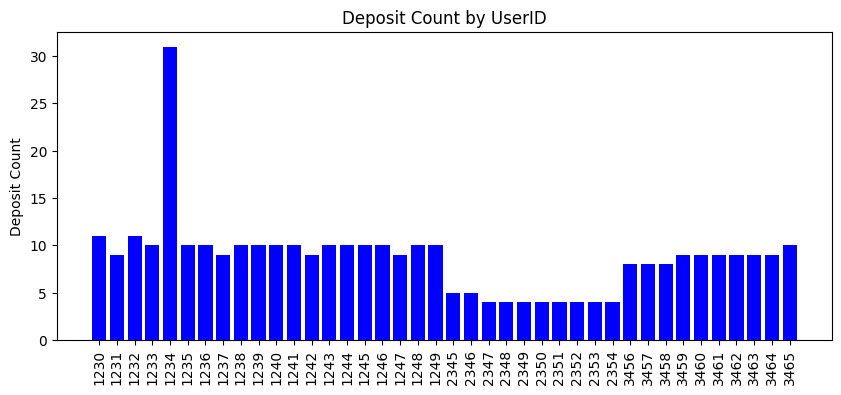

In [2]:
user_averages = defaultdict(list)

for deposit in deposits:
    user_averages[deposit.user_id].append(deposit.amount)

user_average_amounts = {f'UserID - {user_id}': sum(amounts) / len(amounts) for user_id, amounts in user_averages.items()}

user_ids = list(user_average_amounts.keys())
average_amounts = list(user_average_amounts.values())
average_deposit = sum(average_amounts) / len(average_amounts)

plt.figure(figsize=(10, 4))
plt.bar(user_ids, average_amounts, color='blue')
plt.ylabel('Average Deposit Amount (EUR)')
plt.title('Average Deposit Amount by UserID')
plt.xticks(rotation=90) 
plt.axhline(y=average_deposit, color='green', linestyle='--', label='Average Deposit Amount')
plt.legend()
plt.show()

user_counts = defaultdict(int)

for deposit in deposits:
    user_counts[deposit.user_id] += 1

# Convert user IDs to strings
user_ids_str = [str(user_id) for user_id in user_counts.keys()]
user_counts_values = list(user_counts.values())

plt.figure(figsize=(10, 4))
plt.bar(user_ids_str, user_counts_values, color='blue')
plt.ylabel('Deposit Count')
plt.title('Deposit Count by UserID')
plt.xticks(rotation=90)
plt.show()

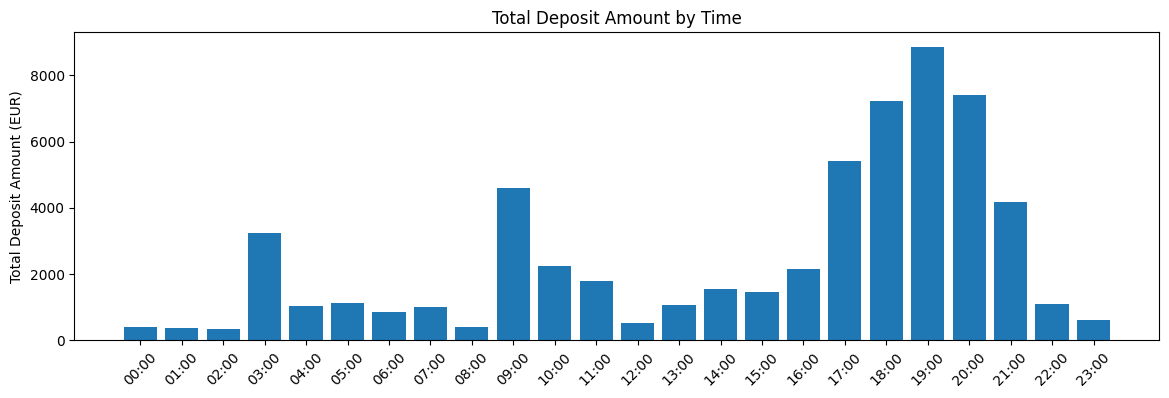

In [3]:
time_sums = defaultdict(int)

for deposit in deposits:
    deposit_time = datetime.strptime(deposit.date, "%Y-%m-%d %H:%M").time()
    hour_in_seconds = deposit_time.hour * 3600 + deposit_time.minute * 60 + deposit_time.second
    time_sums[hour_in_seconds] += deposit.amount

sorted_keys = sorted(time_sums.keys())
x_labels = [str(datetime.utcfromtimestamp(seconds).strftime('%H:%M')) for seconds in sorted_keys]
time_values = [time_sums[key] for key in sorted_keys]
plt.figure(figsize=(14, 4))
plt.bar(x_labels, time_values)
plt.ylabel('Total Deposit Amount (EUR)')
plt.title('Total Deposit Amount by Time')
plt.xticks(rotation=45)
plt.show()

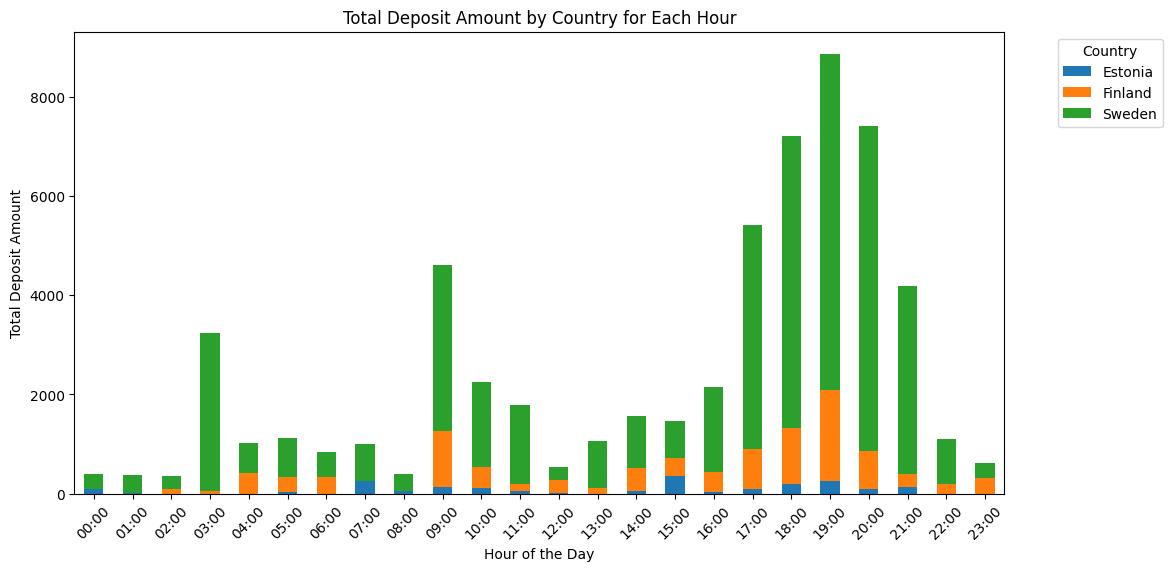

In [4]:
df = pd.DataFrame({
    'Country': [deposit.country for deposit in deposits],
    'Hour': [datetime.strptime(deposit.date, "%Y-%m-%d %H:%M").strftime('%H:%M') for deposit in deposits],
    'Amount': [deposit.amount for deposit in deposits]
})

grouped = df.groupby(['Hour', 'Country'])['Amount'].sum().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Total Deposit Amount')
plt.title('Total Deposit Amount by Country for Each Hour')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

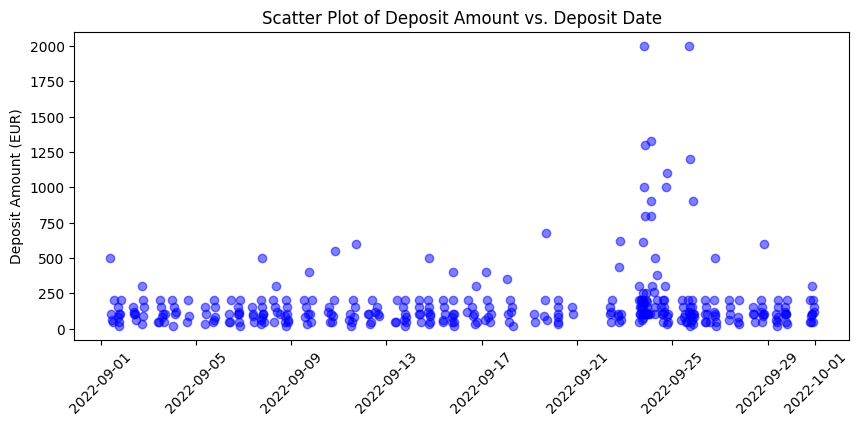

In [5]:
deposit_times = [datetime.strptime(deposit.date, "%Y-%m-%d %H:%M") for deposit in deposits]
deposit_amounts = [deposit.amount for deposit in deposits]

plt.figure(figsize=(10, 4))
plt.scatter(deposit_times, deposit_amounts, alpha=0.5, color='blue')
plt.ylabel('Deposit Amount (EUR)')
plt.title('Scatter Plot of Deposit Amount vs. Deposit Date')
plt.xticks(rotation=45)
plt.show()

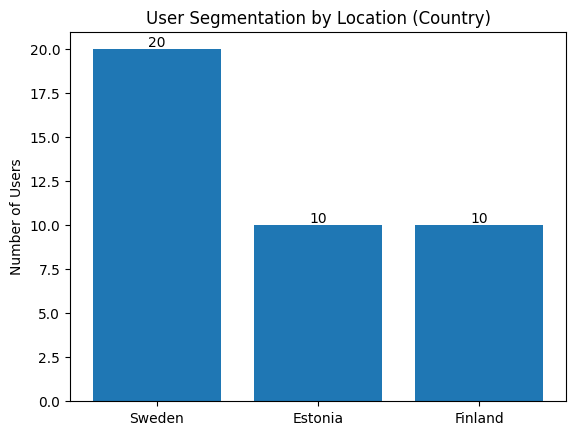

In [6]:
def segment_by_location(user):
    return user.country

segmented_users = {segment_by_location(user): sum(1 for u in users if segment_by_location(u) == segment_by_location(user)) for user in users}
segments = list(segmented_users.keys())
segment_counts = list(segmented_users.values())

bars = plt.bar(segments, segment_counts)
plt.ylabel('Number of Users')
plt.title('User Segmentation by Location (Country)')
for bar, count in zip(bars, segment_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

plt.show()

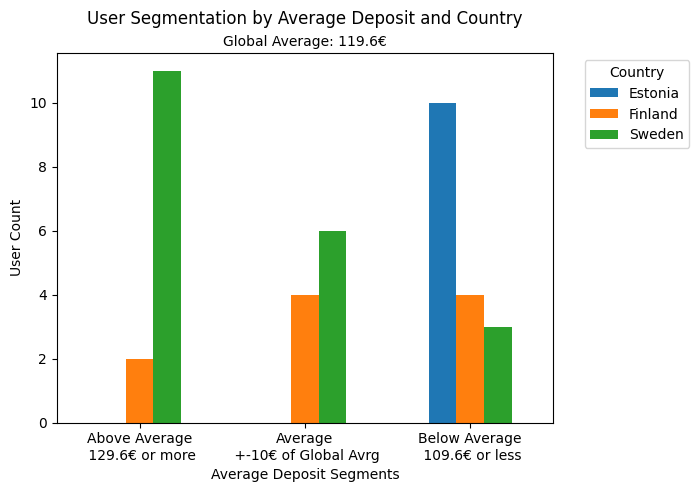

In [4]:
users_data = {
    'User': [user.user_id for user in users],
    'Average Deposit': [user.average_deposit for user in users],
    'Country': [user.country for user in users]
}

user_df = pd.DataFrame(users_data)
global_average_deposit = user_df['Average Deposit'].mean()
user_df['Segment'] = user_df['Average Deposit'].apply(lambda x: 'Above Average\n 129.6€ or more' if x >= global_average_deposit + 10
                                                    else ('Below Average\n 109.6€ or less' if x <= global_average_deposit - 10 else 'Average\n +-10€ of Global Avrg'))

user_counts = user_df.groupby(['Segment', 'Country']).size().unstack(fill_value=0)

plt.text(0.5, 1.02, f'Global Average: {global_average_deposit:.1f}€', horizontalalignment='center', transform=plt.gca().transAxes)   
user_counts.plot(kind='bar', ax=plt.gca())
plt.xlabel('Average Deposit Segments')
plt.ylabel('User Count')
plt.title('User Segmentation by Average Deposit and Country\n')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()